In [2]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.1

Found existing installation: scikit-learn 0.23.1
Uninstalling scikit-learn-0.23.1:
  Successfully uninstalled scikit-learn-0.23.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.23.1-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)


In [3]:
!pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached chembl_webresource_client-0.10.8-py3-none-any.whl (55 kB)
  Using cached requests_cache-0.7.5-py3-none-any.whl (39 kB)
     |████████████████████████████████| 596 kB 7.7 MB/s 
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)
  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6349 sha256=c0f1662e2dd62697d0c8e15d6c289bf6f9797fe23384c8ea3d47e7c9bb9da481
  Stored in directory: /root/.cache/pip/wheels/88/96/68/c2be18e7406804be2e593e1c37845f2dd20ac2ce1381ce40b0
Successfully built easydict
ERROR: lazypredict 0.2.9 has requirement PyYAML==5.3.1, but you'll have pyyaml 6.0 which is incompatible.
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 5.3.1
    Uninstalling PyYAML-5.3.1:
      Successfully uninstalle

In [4]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
target = new_client.target
target_query = target.search('aromatase')
targets = pd.DataFrame.from_dict(target_query)
targets


,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116


In [5]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL3859'

In [6]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df.head(3)


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,530035,[],CHEMBL661155,Inhibition of rat ovarian Cytochrome P450 19A,B,None,None,BAO_0000190,BAO_0000357,...,Rattus norvegicus,Cytochrome P450 19A1,10116,None,None,IC50,uM,UO_0000065,None,34.0
1,None,539290,[],CHEMBL649360,In vitro inhibition of rat ovarian aromatase c...,B,None,None,BAO_0000190,BAO_0000357,...,Rattus norvegicus,Cytochrome P450 19A1,10116,None,None,IC50,uM,UO_0000065,None,2.0
2,None,553204,[],CHEMBL649360,In vitro inhibition of rat ovarian aromatase c...,B,None,None,BAO_0000190,BAO_0000357,...,Rattus norvegicus,Cytochrome P450 19A1,10116,None,None,IC50,uM,UO_0000065,None,8.0


In [7]:
df.standard_type.unique()
df.to_csv('bioactivity_data.csv', index=False)

In [8]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [9]:
! mkdir "/content/gdrive/My Drive/Colab Notebooks/data2"

mkdir: cannot create directory ‘/content/gdrive/My Drive/Colab Notebooks/data2’: File exists


In [10]:
! cp bioactivity_data.csv "/content/gdrive/My Drive/Colab Notebooks/data"
! ls -l "/content/gdrive/My Drive/Colab Notebooks/data"

-rw------- 1 root root 5953 Sep 18 07:25 '/content/gdrive/My Drive/Colab Notebooks/data'


In [11]:
! ls

acetylcholinesterase_03_bioactivity_data_curated.csv
acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv.1
acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv
acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.1
acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.2
bioactivity_data.csv
bioactivity_data_preprocessed.csv
bioactivity_data_raw.csv
bioactivity_preprocessed_data.csv
descriptors_output.csv
gdrive
__MACOSX
mannwhitneyu_LogP.csv
mannwhitneyu_MW.csv
mannwhitneyu_NumHAcceptors.csv
mannwhitneyu_NumHDonors.csv
mannwhitneyu_pIC50.csv
Miniconda3-py37_4.8.2-Linux-x86_64.sh
molecule.smi
PaDEL-Descriptor
padel.sh
padel.zip
plot_bioactivity_class.pdf
plot_ic50.pdf
plot_LogP.pdf
plot_MW.pdf
plot_MW_vs_LogP.pdf
plot_NumHAcceptors.pdf
plot_NumHDonors.pdf
results.zip
sample_data


In [12]:
! head bioactivity_data.csv

activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,530035,[],CHEMBL661155,Inhibition of rat ovarian Cytochrome P450 19A,B,,,BAO_0000190,BAO_0000357,single protein format,CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,,,CHEMBL1125863,J. Med. Chem.,1991,"{'bei': '19.24', 'le': '0.36', 'lle': '3.12', 'sei': '6.19'}",CHEMBL488,AMINOGLUTETHIMIDE,CHEMBL488,4.47,0,http://www.openphacts.org/uni

In [13]:
df2 = df[df.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,530035,[],CHEMBL661155,Inhibition of rat ovarian Cytochrome P450 19A,B,None,None,BAO_0000190,BAO_0000357,...,Rattus norvegicus,Cytochrome P450 19A1,10116,None,None,IC50,uM,UO_0000065,None,34.0
1,None,539290,[],CHEMBL649360,In vitro inhibition of rat ovarian aromatase c...,B,None,None,BAO_0000190,BAO_0000357,...,Rattus norvegicus,Cytochrome P450 19A1,10116,None,None,IC50,uM,UO_0000065,None,2.0
2,None,553204,[],CHEMBL649360,In vitro inhibition of rat ovarian aromatase c...,B,None,None,BAO_0000190,BAO_0000357,...,Rattus norvegicus,Cytochrome P450 19A1,10116,None,None,IC50,uM,UO_0000065,None,8.0
3,None,615833,[],CHEMBL664329,Binding affinity for Cytochrome P450 19A1,B,None,None,BAO_0000190,BAO_0000357,...,Rattus norvegicus,Cytochrome P450 19A1,10116,None,None,IC50,nM,UO_0000065,None,3.0
4,None,789248,[],CHEMBL664334,In vitro inhibition of rat ovarian microsomal ...,B,None,None,BAO_0000190,BAO_0000019,...,Rattus norvegicus,Cytochrome P450 19A1,10116,None,None,IC50,uM,UO_0000065,None,6.2
5,None,819891,[],CHEMBL664334,In vitro inhibition of rat ovarian microsomal ...,B,None,None,BAO_0000190,BAO_0000019,...,Rattus norvegicus,Cytochrome P450 19A1,10116,None,None,IC50,uM,UO_0000065,None,0.265
6,None,15742388,[],CHEMBL3624597,Inhibition of rat ovarian aromatase,B,None,None,BAO_0000190,BAO_0000357,...,Rattus norvegicus,Cytochrome P450 19A1,10116,None,None,IC50,uM,UO_0000065,None,4.6
7,None,15742389,[],CHEMBL3624597,Inhibition of rat ovarian aromatase,B,None,None,BAO_0000190,BAO_0000357,...,Rattus norvegicus,Cytochrome P450 19A1,10116,None,None,IC50,uM,UO_0000065,None,0.17
8,None,15742390,[],CHEMBL3624597,Inhibition of rat ovarian aromatase,B,None,None,BAO_0000190,BAO_0000357,...,Rattus norvegicus,Cytochrome P450 19A1,10116,None,None,IC50,uM,UO_0000065,None,0.26
9,None,16433981,[],CHEMBL3755852,Inhibition of aromatase in denucleated ovarian...,B,None,None,BAO_0000190,BAO_0000357,...,Rattus norvegicus,Cytochrome P450 19A1,10116,None,None,IC50,uM,UO_0000065,None,0.28


Labeling compounds as either being active, inactive or intermediate
**The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.**

In [14]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [15]:
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)
  canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)
  standard_value = []
for i in df2.standard_value:
  standard_value.append(i)
  
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL488,CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,inactive,34000.0
1,CHEMBL93828,O=C1c2cccc(O)c2CCC1Cc1ccncc1,intermediate,2000.0
2,CHEMBL90427,COc1cccc2c1CCC(Cc1ccncc1)C2=O,intermediate,8000.0
3,CHEMBL100749,Cn1nnc2ccc(C(c3ccc(Cl)cc3)n3cncn3)cc21,active,3.0
4,CHEMBL488,CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,intermediate,6200.0
5,CHEMBL294361,COc1ccc2c(c1)C1C(CC2)C1c1ccncc1,active,265.0
6,CHEMBL90585,O=C1/C(=C/c2ccncc2)CCc2ccccc21,intermediate,4600.0
7,CHEMBL168434,O=C1/C(=C/c2c[nH]cn2)CCc2ccccc21,active,170.0
8,CHEMBL169251,O=C1/C(=C\c2c[nH]cn2)CCc2ccccc21,active,260.0
9,CHEMBL3753401,C[C@@H]1OC(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4...,active,280.0


In [16]:

pd.concat([df3,pd.Series(bioactivity_class)], axis=1)

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,0
0,CHEMBL488,CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,inactive,34000.0,inactive
1,CHEMBL93828,O=C1c2cccc(O)c2CCC1Cc1ccncc1,intermediate,2000.0,intermediate
2,CHEMBL90427,COc1cccc2c1CCC(Cc1ccncc1)C2=O,intermediate,8000.0,intermediate
3,CHEMBL100749,Cn1nnc2ccc(C(c3ccc(Cl)cc3)n3cncn3)cc21,active,3.0,active
4,CHEMBL488,CCC1(c2ccc(N)cc2)CCC(=O)NC1=O,intermediate,6200.0,intermediate
5,CHEMBL294361,COc1ccc2c(c1)C1C(CC2)C1c1ccncc1,active,265.0,active
6,CHEMBL90585,O=C1/C(=C/c2ccncc2)CCc2ccccc21,intermediate,4600.0,intermediate
7,CHEMBL168434,O=C1/C(=C/c2c[nH]cn2)CCc2ccccc21,active,170.0,active
8,CHEMBL169251,O=C1/C(=C\c2c[nH]cn2)CCc2ccccc21,active,260.0,active
9,CHEMBL3753401,C[C@@H]1OC(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4...,active,280.0,active


In [17]:
df3.to_csv('bioactivity_preprocessed_data.csv', index=False)

In [18]:
! ls -l

total 145192
-rw-r--r-- 1 root root   385924 Sep 18 01:45 acetylcholinesterase_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root   655414 Sep 18 01:54 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root   655414 Sep 18 02:01 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv.1
-rw-r--r-- 1 root root   489152 Sep 18 01:55 acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root  8363459 Sep 18 03:07 acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
-rw-r--r-- 1 root root  8363909 Sep 18 03:08 acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.1
-rw-r--r-- 1 root root  8363909 Sep 18 03:59 acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.2
-rw-r--r-- 1 root root     5953 Sep 18 07:25 bioactivity_data.csv
-rw-r--r-- 1 root root    10410 Sep 18 01:19 bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root    69403 Sep 18 01:18 bioactivity_data_raw.csv
-rw-r--r-- 1 root

In [19]:
! cp bioactivity_preprocessed_data.csv "/content/gdrive/My Drive/Colab Notebooks/data"
! ls "/content/gdrive/My Drive/Colab Notebooks/data"

'/content/gdrive/My Drive/Colab Notebooks/data'


Search for Target protein
Target search for coronavirus **bold text**

In [20]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


**Select and retrieve bioactivity data for SARS coronavirus 3C-like proteinase (fifth entry)
We will assign the fifth entry (which corresponds to the target protein, coronavirus 3C-like proteinase) to the selected_target variable** 

In [21]:
selected_target = targets.target_chembl_id[4]
selected_target

'CHEMBL3927'

In [22]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(res)
df.head(3)


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5


In [23]:
df.to_csv('bioactivity_data_raw.csv', index=False)

Handling missing data
If any compounds has missing value for the standard_value column then drop it

In [24]:
df2 = df[df.standard_value.notna()]
df2


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,None,None,BAO_0000190,BAO_0000019,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


Labeling compounds as either being active, inactive or intermediate
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [25]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  #else:
  #  bioactivity_class.append("intermediate")
  selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0
...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0


In [26]:
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4
df4.to_csv('bioactivity_data_preprocessed.csv', index=False)
! ls -l

total 145192
-rw-r--r-- 1 root root   385924 Sep 18 01:45 acetylcholinesterase_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root   655414 Sep 18 01:54 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root   655414 Sep 18 02:01 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv.1
-rw-r--r-- 1 root root   489152 Sep 18 01:55 acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root  8363459 Sep 18 03:07 acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
-rw-r--r-- 1 root root  8363909 Sep 18 03:08 acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.1
-rw-r--r-- 1 root root  8363909 Sep 18 03:59 acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.2
-rw-r--r-- 1 root root     5953 Sep 18 07:25 bioactivity_data.csv
-rw-r--r-- 1 root root    10410 Sep 18 07:25 bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root    69403 Sep 18 07:25 bioactivity_data_raw.csv
-rw-r--r-- 1 root

In [27]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-09-18 07:25:56--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M  72.5MB/s    in 1.1s    

2022-09-18 07:25:57 (72.5 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | / - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - \ | / - \ | / - \ | failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: | / - \ | / - 

In [28]:

! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_03_bioactivity_data_curated.csv

--2022-09-18 07:26:34--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_03_bioactivity_data_curated.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 385924 (377K) [text/plain]
Saving to: ‘acetylcholinesterase_03_bioactivity_data_curated.csv.1’

acetylcholinesteras 100%[===================>] 376.88K  --.-KB/s    in 0.02s   

2022-09-18 07:26:34 (19.4 MB/s) - ‘acetylcholinesterase_03_bioactivity_data_curated.csv.1’ saved [385924/385924]



In [29]:
import pandas as pd
df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
4690,CHEMBL4293155,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC...,2440.0,intermediate
4691,CHEMBL4282558,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)...,2540.0,intermediate
4692,CHEMBL4281727,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(Br)cc3)...,3810.0,intermediate
4693,CHEMBL4292349,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc([N+](=...,3460.0,intermediate


In [30]:
df_no_smiles = df.drop(columns='canonical_smiles')
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
4690,CHEMBL4293155,2440.0,intermediate,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC...
4691,CHEMBL4282558,2540.0,intermediate,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)...
4692,CHEMBL4281727,3810.0,intermediate,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(Br)cc3)...
4693,CHEMBL4292349,3460.0,intermediate,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc([N+](=...


**Calculate Lipinski descriptors**

The Lipinski's Rule stated the following:

Molecular weight < 500 Dalton
Octanol-water partition coefficient (LogP) < 5
Hydrogen bond donors < 5
Hydrogen bond acceptors < 10

In [31]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [32]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [33]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.80320,0.0,6.0
1,376.913,4.55460,0.0,5.0
2,426.851,5.35740,0.0,5.0
3,404.845,4.70690,0.0,5.0
4,346.334,3.09530,0.0,6.0
...,...,...,...,...
4690,511.150,7.07230,2.0,3.0
4691,511.150,7.07230,2.0,3.0
4692,555.601,7.18140,2.0,3.0
4693,521.702,6.32710,2.0,5.0


In [34]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.80320,0.0,6.0
1,376.913,4.55460,0.0,5.0
2,426.851,5.35740,0.0,5.0
3,404.845,4.70690,0.0,5.0
4,346.334,3.09530,0.0,6.0
...,...,...,...,...
4690,511.150,7.07230,2.0,3.0
4691,511.150,7.07230,2.0,3.0
4692,555.601,7.18140,2.0,3.0
4693,521.702,6.32710,2.0,5.0


In [35]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
4690,CHEMBL4293155,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC...,2440.0,intermediate
4691,CHEMBL4282558,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)...,2540.0,intermediate
4692,CHEMBL4281727,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(Br)cc3)...,3810.0,intermediate
4693,CHEMBL4292349,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc([N+](=...,3460.0,intermediate


In [36]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.80320,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.55460,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.35740,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.70690,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.09530,0.0,6.0
...,...,...,...,...,...,...,...,...
4690,CHEMBL4293155,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC...,2440.0,intermediate,511.150,7.07230,2.0,3.0
4691,CHEMBL4282558,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)...,2540.0,intermediate,511.150,7.07230,2.0,3.0
4692,CHEMBL4281727,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(Br)cc3)...,3810.0,intermediate,555.601,7.18140,2.0,3.0
4693,CHEMBL4292349,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc([N+](=...,3460.0,intermediate,521.702,6.32710,2.0,5.0


onvert IC50 to pIC50
To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

In [37]:

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [38]:
df_combined.standard_value.describe()

count    4.695000e+03
mean     3.210931e+12
std      1.189580e+14
min      6.000000e-03
25%      1.250000e+02
50%      2.246000e+03
75%      1.753000e+04
max      5.888437e+15
Name: standard_value, dtype: float64

In [39]:
-np.log10( (10**-9)* 100000000 )

1.0

In [40]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [41]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x
  

In [42]:
  df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,800.0
...,...,...,...,...,...,...,...,...
4690,CHEMBL4293155,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC...,intermediate,511.150,7.07230,2.0,3.0,2440.0
4691,CHEMBL4282558,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)...,intermediate,511.150,7.07230,2.0,3.0,2540.0
4692,CHEMBL4281727,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(Br)cc3)...,intermediate,555.601,7.18140,2.0,3.0,3810.0
4693,CHEMBL4292349,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc([N+](=...,intermediate,521.702,6.32710,2.0,5.0,3460.0


In [43]:
df_norm.standard_value_norm.describe()

count    4.695000e+03
mean     3.276494e+05
std      4.718369e+06
min      6.000000e-03
25%      1.250000e+02
50%      2.246000e+03
75%      1.753000e+04
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [44]:
df_final = pIC50(df_norm)
df_final


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.80320,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.55460,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.35740,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.70690,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.09530,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
4690,CHEMBL4293155,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC...,intermediate,511.150,7.07230,2.0,3.0,5.612610
4691,CHEMBL4282558,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)...,intermediate,511.150,7.07230,2.0,3.0,5.595166
4692,CHEMBL4281727,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(Br)cc3)...,intermediate,555.601,7.18140,2.0,3.0,5.419075
4693,CHEMBL4292349,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc([N+](=...,intermediate,521.702,6.32710,2.0,5.0,5.460924


In [45]:
df_final.pIC50.describe()

count    4695.000000
mean        5.820864
std         1.552813
min         1.000000
25%         4.756219
50%         5.648590
75%         6.903090
max        11.221849
Name: pIC50, dtype: float64

In [46]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [47]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
4675,CHEMBL4284261,CCN(C)Cc1cc(N)ccc1O.Cl.Cl,inactive,180.251,1.4261,2.0,3.0,3.015428
4676,CHEMBL4276921,CN(C)Cc1cc(N)ccc1O.Cl.Cl,inactive,166.224,1.0360,2.0,3.0,2.813467
4677,CHEMBL4292574,CNCc1cc(N)ccc1O.Cl.Cl,inactive,152.197,0.6938,3.0,3.0,3.476904
4685,CHEMBL4292766,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3F)CC2...,active,494.695,6.5580,2.0,3.0,6.124939


In [48]:

df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

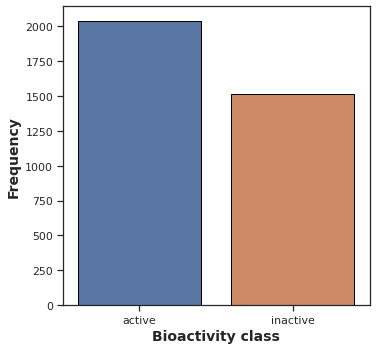

In [49]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

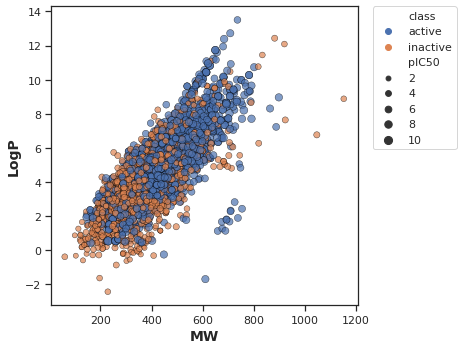

In [50]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

pIC50 value

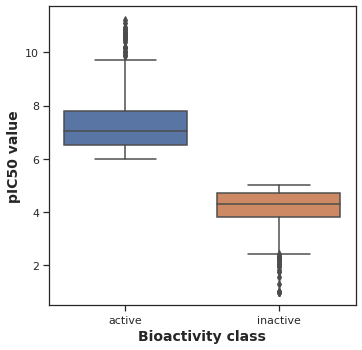

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [52]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.0,0.05,Different distribution (reject H0)


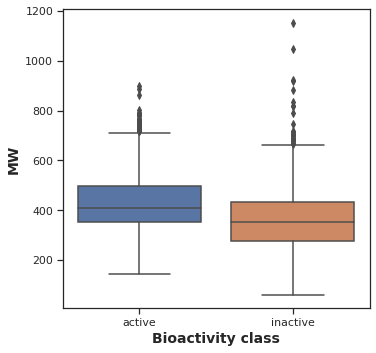

In [53]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [54]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1058779.0,2.072256e-57,0.05,Different distribution (reject H0)


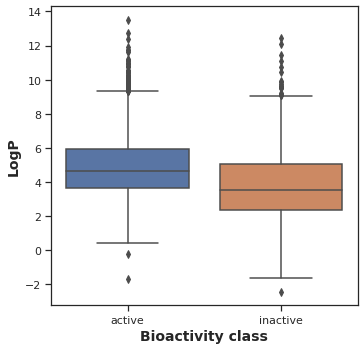

In [55]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

Statistical analysis | Mann-Whitney U Test

In [56]:

mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,1041900.0,2.318667e-61,0.05,Different distribution (reject H0)


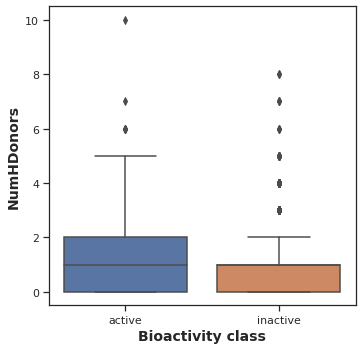

In [57]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [58]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1361005.5,2.520096e-10,0.05,Different distribution (reject H0)


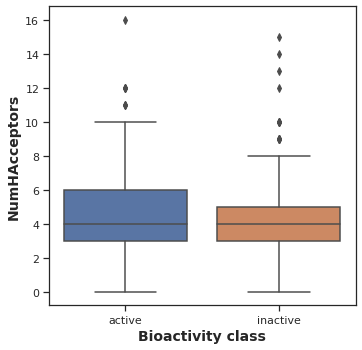

In [59]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [60]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1407572.5,0.000004,0.05,Different distribution (reject H0)


In [61]:

! zip -r results.zip . -i *.csv *.pdf

updating: plot_bioactivity_class.pdf (deflated 39%)
updating: bioactivity_data.csv (deflated 75%)
updating: plot_MW_vs_LogP.pdf (deflated 2%)
updating: plot_NumHAcceptors.pdf (deflated 38%)
updating: plot_NumHDonors.pdf (deflated 38%)
updating: mannwhitneyu_MW.csv (deflated 10%)
updating: bioactivity_data_raw.csv (deflated 90%)
updating: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 76%)
updating: mannwhitneyu_LogP.csv (deflated 7%)
updating: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)
updating: plot_LogP.pdf (deflated 37%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: plot_ic50.pdf (deflated 37%)
updating: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
updating: bioactivity_data_preprocessed.csv (deflated 80%)
updating: plot_MW.pdf (deflated 38%)
updating: bioactivity_preprocessed_data.csv (deflated 57%)
updating: mannwhitneyu_NumHDonors.csv (deflated 11%)
updating: mannwhitneyu_pIC50.csv (defl

In [62]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh


--2022-09-18 07:26:43--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-09-18 07:26:43--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.1’

padel.zip.1         100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2022-09-18 07:26:43 (216 MB/s) - ‘padel.zip.1’ saved [25768637/25768637]

--2022-09-18 07:26:44--  https://gi

In [63]:

! unzip padel.zip

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace PaDEL-Descriptor/MACCSFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace PaDEL-Descriptor/AtomPairs2DFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace PaDEL-Descriptor/EStateFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace PaDEL-Descriptor/Fingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace PaDEL-Descriptor/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/PaDEL-Descriptor/._.DS_Store? [y]es, [n]o, [A]ll, 

In [ ]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv

In [108]:
import pandas as pd
df3 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.33,2.80,0.00,6.00,6.12
1,1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.91,4.55,0.00,5.00,7.00
2,2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.85,5.36,0.00,5.00,4.30
3,3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.85,4.71,0.00,5.00,6.52
4,4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.33,3.10,0.00,6.00,6.10
...,...,...,...,...,...,...,...,...,...
4690,4690,CHEMBL4293155,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccccc3Cl)CC...,intermediate,511.15,7.07,2.00,3.00,5.61
4691,4691,CHEMBL4282558,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc(Cl)c3)...,intermediate,511.15,7.07,2.00,3.00,5.60
4692,4692,CHEMBL4281727,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3ccc(Br)cc3)...,intermediate,555.60,7.18,2.00,3.00,5.42
4693,4693,CHEMBL4292349,CC(C)(C)c1cc(/C=C/C(=O)NCCC2CCN(Cc3cccc([N+](=...,intermediate,521.70,6.33,2.00,5.00,5.46


In [ ]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)
! cat molecule.smi | head -5

In [ ]:
! cat molecule.smi | wc -l

In [111]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv
java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [69]:
! bash padel.sh

Processing CHEMBL133897 in molecule.smi (1/4695). 
Processing CHEMBL336398 in molecule.smi (2/4695). 
Processing CHEMBL131588 in molecule.smi (3/4695). 
Processing CHEMBL130628 in molecule.smi (4/4695). Average speed: 6.71 s/mol.
Processing CHEMBL130478 in molecule.smi (5/4695). Average speed: 2.53 s/mol.
Processing CHEMBL130112 in molecule.smi (6/4695). Average speed: 2.00 s/mol.
Processing CHEMBL130098 in molecule.smi (7/4695). Average speed: 1.60 s/mol.
Processing CHEMBL337486 in molecule.smi (8/4695). Average speed: 1.45 s/mol.
Processing CHEMBL336538 in molecule.smi (9/4695). Average speed: 1.29 s/mol.
Processing CHEMBL131051 in molecule.smi (10/4695). Average speed: 1.20 s/mol.
Processing CHEMBL341437 in molecule.smi (11/4695). Average speed: 1.08 s/mol.
Processing CHEMBL335033 in molecule.smi (12/4695). Average speed: 1.01 s/mol.
Processing CHEMBL122983 in molecule.smi (13/4695). Average speed: 1.03 s/mol.
Processing CHEMBL338720 in molecule.smi (14/4695). Average speed: 0.90 s/

In [112]:

! ls -l





total 272068
-rw-r--r-- 1 root root   385924 Sep 18 01:45 acetylcholinesterase_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root   385924 Sep 18 07:26 acetylcholinesterase_03_bioactivity_data_curated.csv.1
-rw-r--r-- 1 root root   655414 Sep 18 07:26 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root   655414 Sep 18 02:01 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv.1
-rw-r--r-- 1 root root   655414 Sep 18 07:28 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv.2
-rw-r--r-- 1 root root   655414 Sep 18 07:48 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv.3
-rw-r--r-- 1 root root   489152 Sep 18 07:26 acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root  8363909 Sep 18 07:46 acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
-rw-r--r-- 1 root root  8363909 Sep 18 03:08 acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.1
-rw-r--r-- 1 root root  8363909 Sep 18

In [113]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,CHEMBL4293155,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4691,CHEMBL4282558,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4692,CHEMBL4281727,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4693,CHEMBL4292349,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [115]:
df3_Y = df3['pIC50']
df3_Y

0      6.12
1      7.00
2      4.30
3      6.52
4      6.10
       ... 
4690   5.61
4691   5.60
4692   5.42
4693   5.46
4694   5.56
Name: pIC50, Length: 4695, dtype: float64

In [116]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.12
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.00
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.30
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.52
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.61
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.60
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.42
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.46


In [117]:
dataset3.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

Testing ON Random Forest

In [118]:

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [119]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2022-09-18 07:49:21--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2022-09-18 07:49:21--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

In [120]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [121]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [122]:
Y = df.pIC50
Y

0      6.12
1      7.00
2      4.30
3      6.52
4      6.10
       ... 
4690   5.61
4691   5.60
4692   5.42
4693   5.46
4694   5.56
Name: pIC50, Length: 4695, dtype: float64

In [123]:
X.shape

(4695, 881)

In [124]:
Y.shape

(4695,)

In [125]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape

((3756, 137), (3756,))

In [127]:
X_test.shape, Y_test.shape

((939, 137), (939,))

In [128]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5212664363044173

In [129]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show(*args, **kw)>

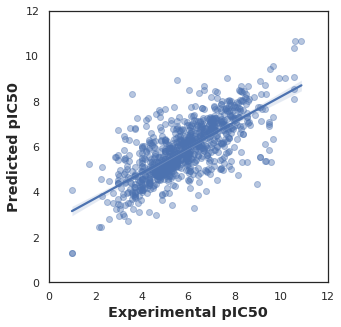

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

Comparing Regressors

In [131]:

! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
import pandas as pd
import seaborn as sns
from sklearn.utils.testing import ignore_warnings
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [91]:
pip install -U scikit-learn==1.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.0.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.2 MB)
ERROR: lazypredict 0.2.9 has requirement scikit-learn==0.23.1, but you'll have scikit-learn 1.0.1 which is incompatible.
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


In [134]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2022-09-18 08:31:55--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2022-09-18 08:31:55--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_

In [135]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [136]:
X.shape

(4695, 881)

In [137]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(4695, 137)

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [139]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:00<00:00, 132551.37it/s]


In [140]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.86,0.86,0.58,6.72
DecisionTreeRegressor,0.86,0.86,0.58,0.19
ExtraTreeRegressor,0.86,0.86,0.58,0.16
GaussianProcessRegressor,0.86,0.86,0.58,5.29
RandomForestRegressor,0.82,0.83,0.65,4.63
XGBRegressor,0.82,0.82,0.65,1.95
BaggingRegressor,0.80,0.81,0.68,0.61
MLPRegressor,0.75,0.76,0.77,6.14
HistGradientBoostingRegressor,0.68,0.69,0.87,2.47


In [141]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


[(0.0, 1.0)]

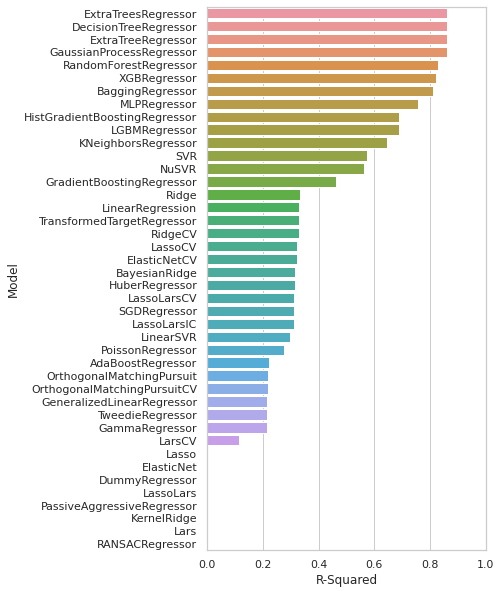

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

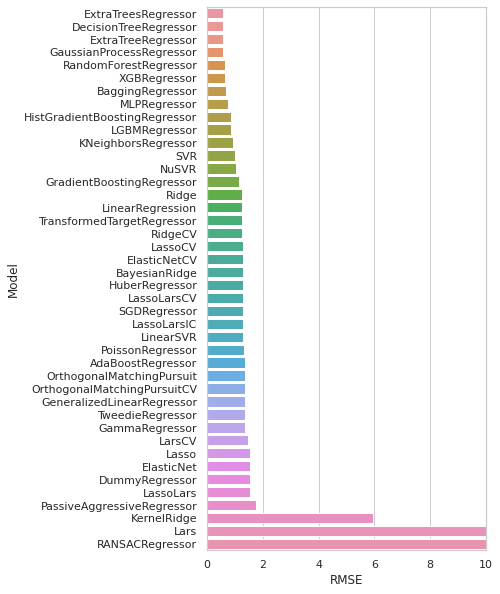

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

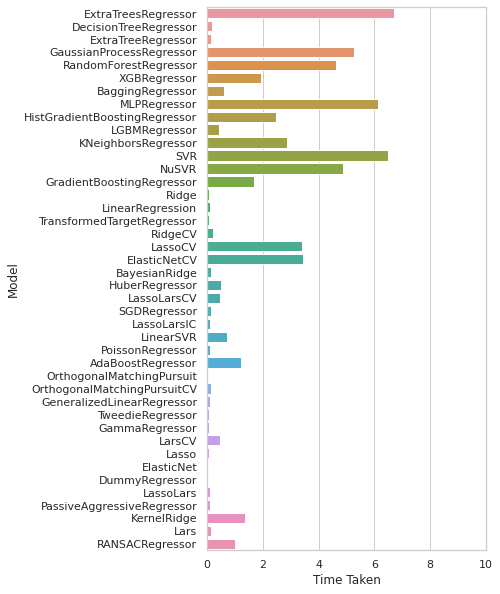

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))
